# MOD300: Assignment 4

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Nov 26, 2025**


In [2]:
# install git package, only run once
#%pip install git+https://github.com/henrysky/milkyway_plot.git

In [3]:
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

from main import *

# Topic 1


# Task 1: Reproduce the image of the milky way via MWSkyMap


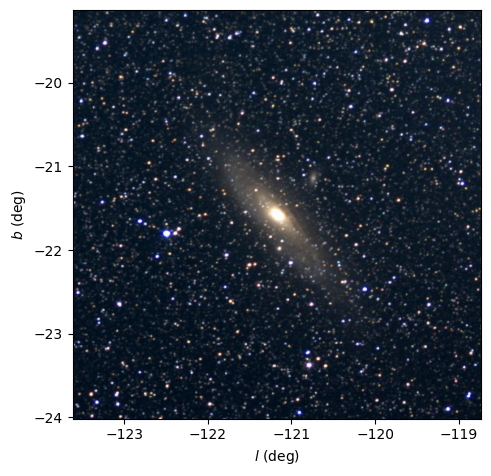

In [4]:
mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy.png')
plt.show()

## Task 2: Generate multiple visualizations with different centers and radii


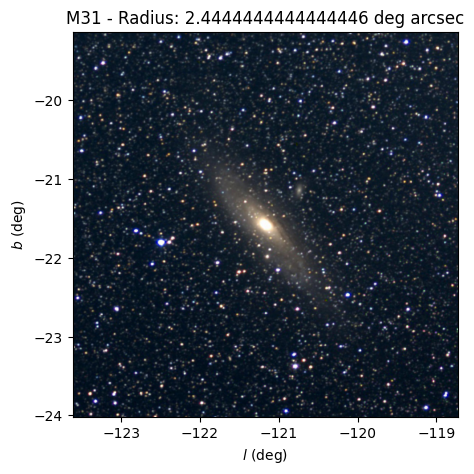

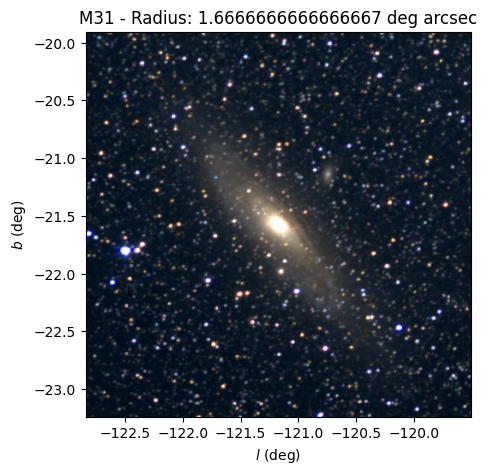

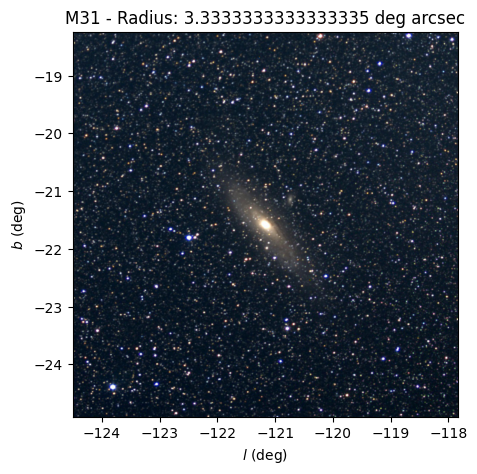

In [5]:
fig1, _ = create_sky_map("M31", (8800, 8800) * u.arcsec, "Mellinger color optical survey")
fig2, _ = create_sky_map("M31", (6000, 6000) * u.arcsec, "Mellinger color optical survey")
fig3, _ = create_sky_map("M31", (12000, 12000) * u.arcsec, "Mellinger color optical survey")

## Task 3: Convert the image to RGB np.array


In [6]:
img_array = plt2rgbarr(fig1)
print(f"Image array shape: {img_array.shape}")
print(f"Image array dtype: {img_array.dtype}")
print(f"Image array min/max values: {img_array.min()}/{img_array.max()}")
print(f"\nFirst pixel RGB values: {img_array[0, 0]}")


Image array shape: (500, 500, 3)
Image array dtype: uint8
Image array min/max values: 0/254

First pixel RGB values: [0 0 0]


## Task 4: Encoding


In [7]:
features, (h, w) = encode_pixels(img_array)

print("Feature array shape", features.shape)
print("Example encoded pixel (R, G, B normalized):", features[0])

Feature array shape (250000, 3)
Example encoded pixel (R, G, B normalized): [0. 0. 0.]


## Task 5: K-means clustering


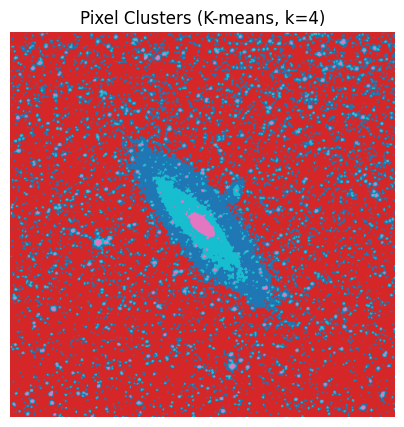

Cluster 0: dark background space - center RGB (normalized) = [ 0.15,  0.17, 0.22]
Cluster 1: dark background space - center RGB (normalized) = [ 0.05,  0.09, 0.14]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.74,  0.72, 0.71]
Cluster 3: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.35,  0.35, 0.36]


In [8]:
label_image, kmeans = kmeans_cluster_pixels(img_array, n_clusters=4)

plot_cluster_labels(label_image, "Pixel Clusters (K-means, k=4)")

for desc in describe_clusters(kmeans): 
    print(desc)

## Task 6: Over-impose your cluster to the image generated in Task 2


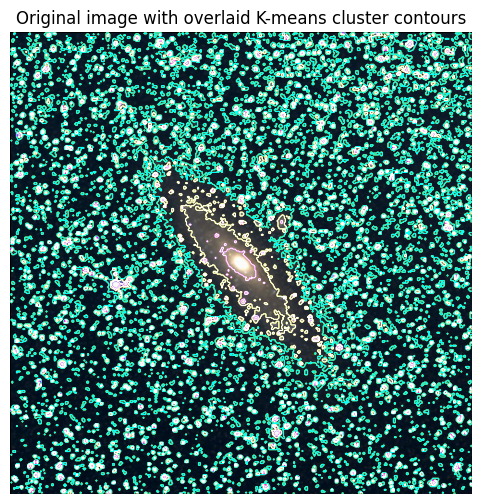

In [9]:
overlay_cluster_contours(img_array, label_image)

## Task 7: Different categories

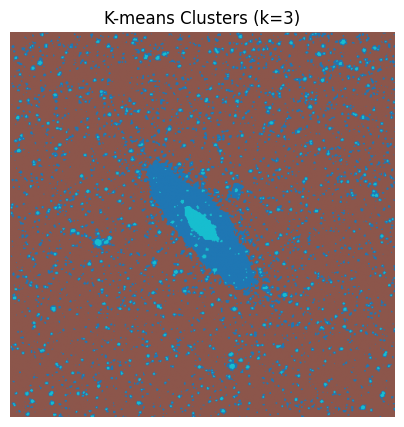

Cluster 0: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.24,  0.25, 0.28]
Cluster 1: dark background space - center RGB (normalized) = [ 0.06,  0.10, 0.15]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.65,  0.63, 0.62]


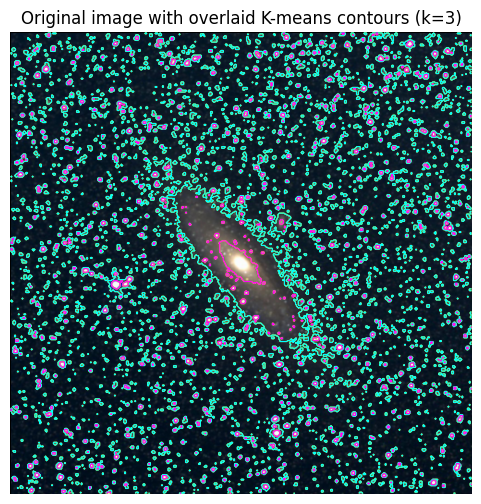

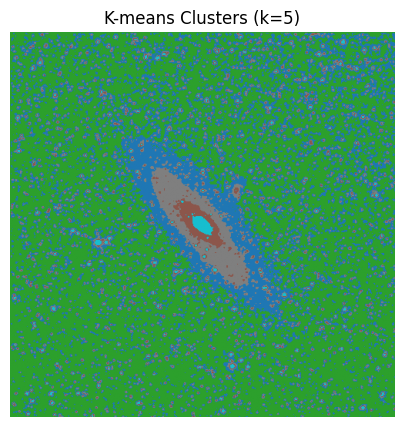

Cluster 0: dark background space - center RGB (normalized) = [ 0.12,  0.15, 0.20]
Cluster 1: dark background space - center RGB (normalized) = [ 0.04,  0.09, 0.14]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.47,  0.46, 0.46]
Cluster 3: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.26,  0.27, 0.29]
Cluster 4: bright core - stars - white-yellow region - center RGB (normalized) = [ 0.82,  0.79, 0.78]


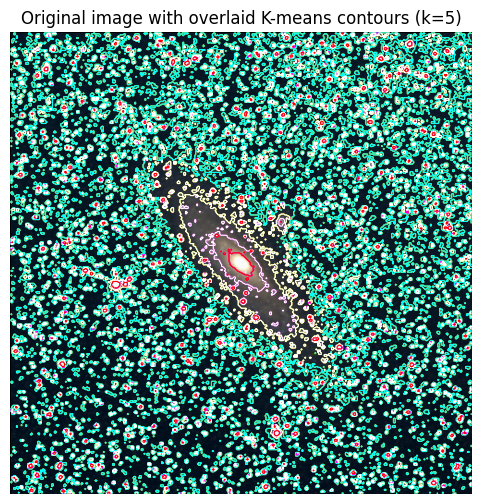

In [11]:
run_task7_experiments(img_array, k_values=(3,5))

By varying the number of clusters K, we can see how an unsupervised learning model interprets different structures in the galaxy image.  
With three clusters, K-means finds the broadest, most dominant components  
With five clusters, K-means captures more subtle structure.  
This demonstrates that we can extract meaningful astrophysical features from pixel color information. 